In [2]:
import pandas as pd
df=pd.read_csv('dataset/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
X=df.drop(columns=['name','status'],axis=1)
y=df['status']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
x_train.shape,y_train.shape

((156, 22), (156,))

In [7]:
x_test.shape,y_test.shape

((39, 22), (39,))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores=[]

for x in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train,y_train)
    pred_result=knn.predict(x_test)
    scores.append(accuracy_score(pred_result,y_test))
scores

[0.8205128205128205,
 0.7435897435897436,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.7692307692307693,
 0.8205128205128205,
 0.7948717948717948,
 0.7692307692307693]

In [12]:
import numpy as np
np.argsort(scores)

array([1, 5, 8, 7, 0, 2, 3, 4, 6], dtype=int64)

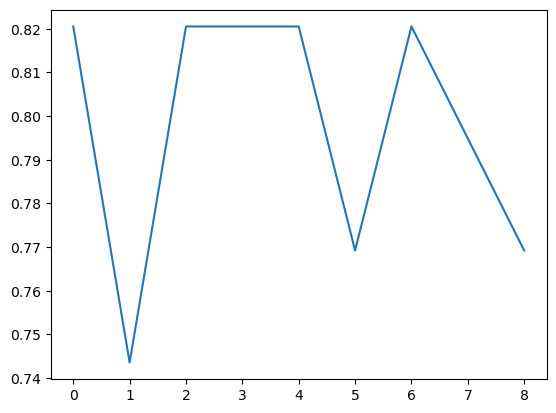

In [13]:
import matplotlib.pyplot as plt
plt.plot(scores)

In [14]:
from sklearn.model_selection import cross_val_score
scores=[]

for x in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train,y_train)
    pred_result=knn.predict(x_test)
    cv_scores=cross_val_score(knn,x_train,y_train,cv=5)
    scores.append(np.max(cv_scores))
scores

[0.967741935483871,
 0.9354838709677419,
 0.9032258064516129,
 0.9032258064516129,
 0.8709677419354839,
 0.8709677419354839,
 0.8387096774193549,
 0.8709677419354839,
 0.8387096774193549]

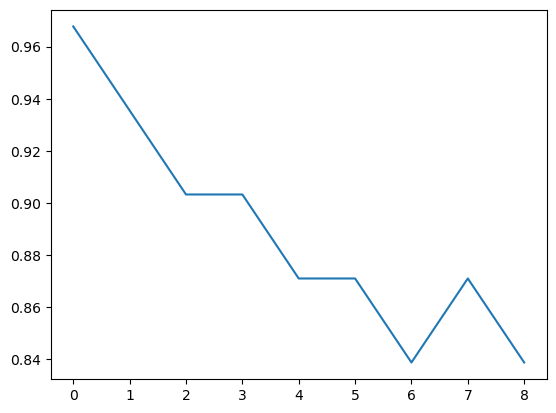

In [15]:
plt.plot(scores)